In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
movies = pd.read_csv("../dataset/movie.csv")
movies.head(10)

,id,name,url,poster,average_rating
0,tt0107692,Ninja Scroll,https://www.imdb.com/title/tt0107692,https://m.media-amazon.com/images/M/MV5BNmEwYm...,7.8
1,tt0106364,Batman: Mask of the Phantasm,https://www.imdb.com/title/tt0106364,https://m.media-amazon.com/images/M/MV5BYTRiMW...,7.8
2,tt0275277,Cowboy Bebop: The Movie,https://www.imdb.com/title/tt0275277,https://m.media-amazon.com/images/M/MV5BNTE5YT...,7.8
3,tt0291350,Millennium Actress,https://www.imdb.com/title/tt0291350,https://m.media-amazon.com/images/M/MV5BNmY4ND...,7.8
4,tt0388473,Tokyo Godfathers,https://www.imdb.com/title/tt0388473,https://m.media-amazon.com/images/S/sash/4Fyxw...,7.8
5,tt2321405,My Life as a Zucchini,https://www.imdb.com/title/tt2321405,https://m.media-amazon.com/images/S/sash/4Fyxw...,7.8
6,tt0327597,Coraline,https://www.imdb.com/title/tt0327597,https://m.media-amazon.com/images/S/sash/4Fyxw...,7.7
7,tt0398286,Tangled,https://www.imdb.com/title/tt0398286,https://m.media-amazon.com/images/S/sash/4Fyxw...,7.7
8,tt1490017,The Lego Movie,https://www.imdb.com/title/tt1490017,https://m.media-amazon.com/images/S/sash/4Fyxw...,7.7
9,tt1979376,Toy Story 4,https://www.imdb.com/title/tt1979376,https://m.media-amazon.com/images/S/sash/4Fyxw...,7.7


In [24]:
print("Number of Rows", movies.shape[0])
print("Number of Column", movies.shape[1])

Number of Rows 653
Number of Column 5


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              653 non-null    object 
 1   name            653 non-null    object 
 2   url             653 non-null    object 
 3   poster          653 non-null    object 
 4   average_rating  653 non-null    float64
dtypes: float64(1), object(4)
memory usage: 25.6+ KB


In [26]:
rating = pd.read_csv("../dataset/rating_final.csv")
rating.head(10)

,movie_id,user_id,rate
0,tt0032455,ur156820301,5.0
1,tt0032455,ur89008813,3.0
2,tt0104652,ur0281280,6.0
3,tt0104652,ur104436023,2.0
4,tt0104652,ur94900494,10.0
5,tt3901826,ur58133658,10.0
6,tt1488589,ur57257775,6.0
7,tt0441773,ur66705434,9.0
8,tt0097757,ur1192901,10.0
9,tt7979580,ur0337549,2.0


In [27]:
print("Number of Rows", rating.shape[0])
print("Number of Column", rating.shape[1])

Number of Rows 59241
Number of Column 3


In [28]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59241 entries, 0 to 59240
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  59241 non-null  object 
 1   user_id   59241 non-null  object 
 2   rate      59241 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


[Text(0.5, 1.0, 'Top 10 Users with the lowest number of ratings')]

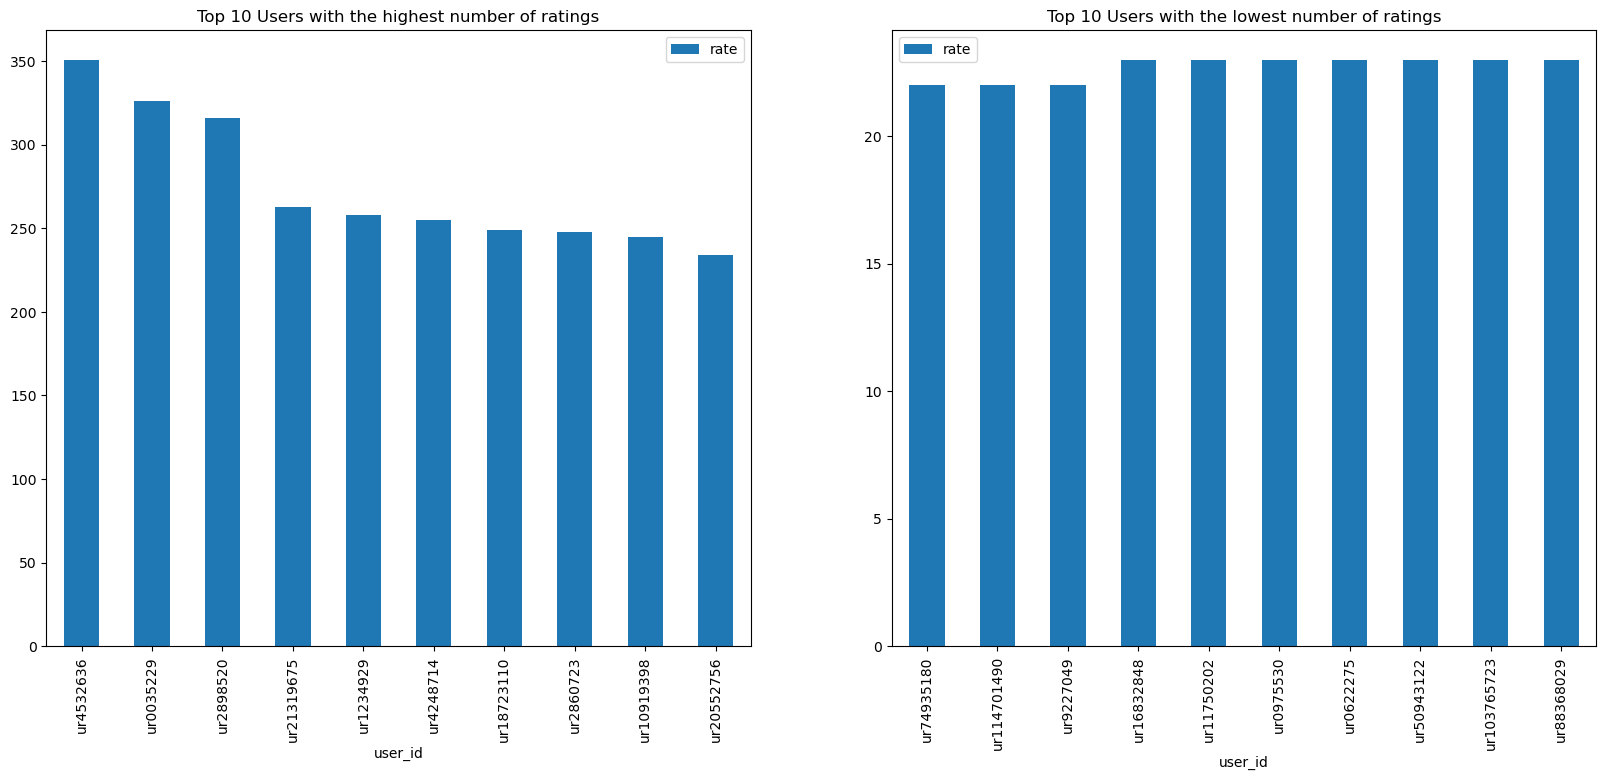

In [29]:
fig, axs = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

df1 = pd.DataFrame(rating.groupby('user_id')['rate'].count().sort_values(ascending=False).head(10))
df1.plot.bar(ax=axs[0])
axs[0].set(title='Top 10 Users with the highest number of ratings')

df2 = pd.DataFrame(rating.groupby('user_id')['rate'].count().sort_values(ascending=True).head(10))
df2.plot.bar(ax=axs[1])
axs[1].set(title='Top 10 Users with the lowest number of ratings')

- Nhận xét: 
    + Top 10 người dùng có số lượng ratings cao nhất:
        - Người dùng có số lượng ratings cao nhất là 351 ratings
        - Số lượng ratings của các người dùng trong nhóm này giảm dần từ 351 xuống 234.
        - Có một sự chênh lệch khá lớn giữa người dùng có số lượng ratings cao nhất và người dùng có số lượng ratings thấp nhất trong nhóm này.
    + Top 10 người dùng có số lượng ratings thấp nhất:
        - Người dùng có số lượng ratings thấp nhất là 22 ratings
        - Số lượng ratings của các người dùng trong nhóm này tương đối thấp và không có sự chênh lệch lớn giữa các giá trị.
    + So sánh:
        - Sự chênh lệch về số lượng ratings giữa hai nhóm là rất rõ rệt.
        - Nhóm "Top người dùng có số lượng ratings cao nhất" quyết định đến kết quả và dữ liệu tổng thể vì có sự đa dạng và số lượng ratings lớn.

[Text(0.5, 1.0, 'Top 10 movies with the lowest number of ratings')]

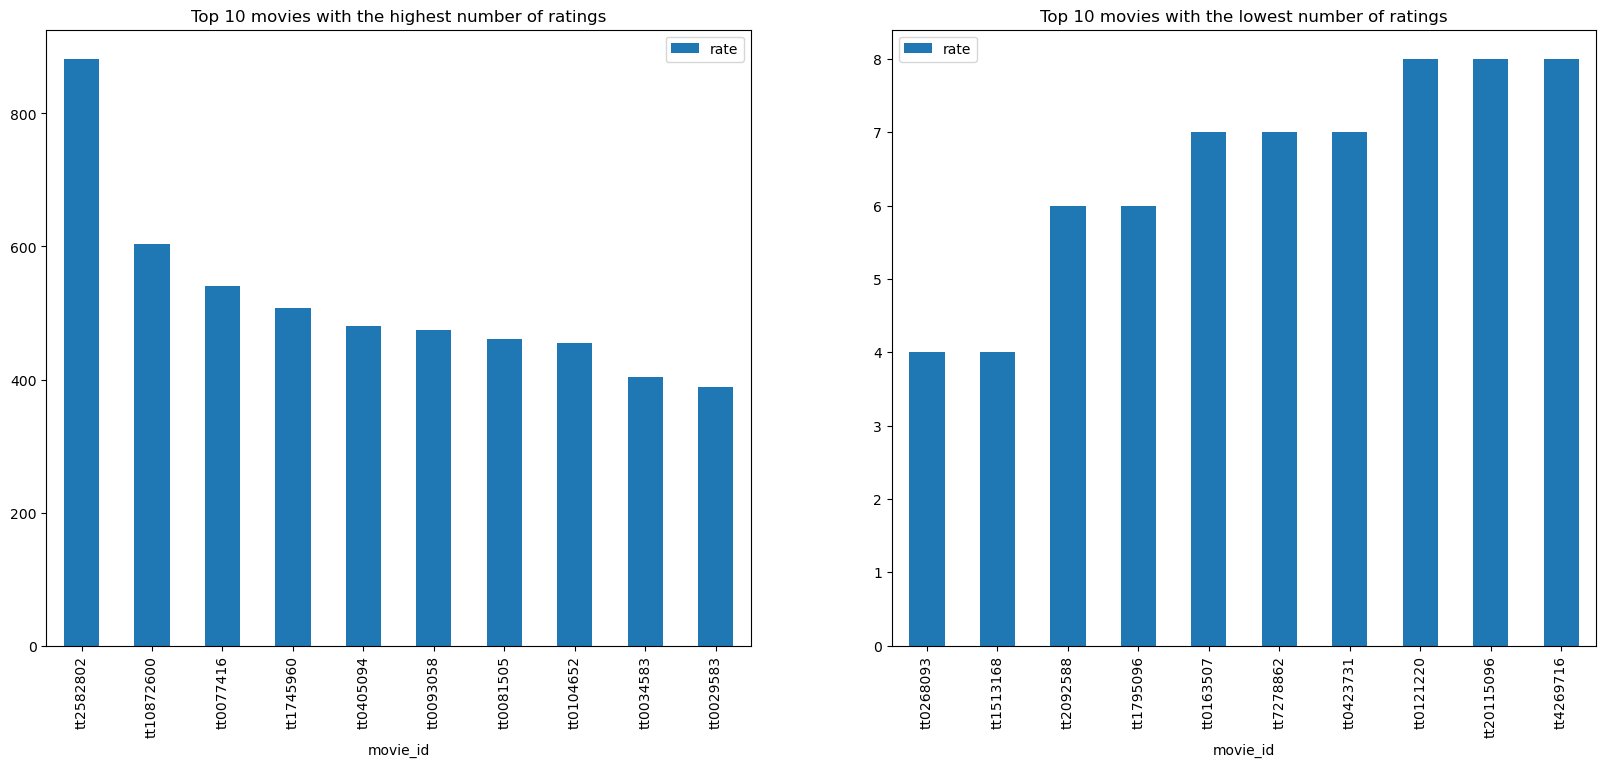

In [30]:
fig, axs = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

df1 = pd.DataFrame(rating.groupby('movie_id')['rate'].count().sort_values(ascending=False).head(10))
df1.plot.bar(ax=axs[0])
axs[0].set(title='Top 10 movies with the highest number of ratings')

df2 = pd.DataFrame(rating.groupby('movie_id')['rate'].count().sort_values(ascending=True).head(10))
df2.plot.bar(ax=axs[1])
axs[1].set(title='Top 10 movies with the lowest number of ratings')

- Nhận xét: 
    + Top 10 phim có số lượng ratings cao nhất:
        - Phim có số lượng ratings cao nhất là 882 ratings
        - Số lượng ratings của các phim trong nhóm này giảm dần từ 882 xuống 389.
        - Có sự chênh lệch đáng kể giữa phim có số lượng ratings cao nhất và phim có số lượng ratings thấp nhất trong nhóm này.
    + Top 10 phim có số lượng ratings thấp nhất:
        - Các phim có số lượng ratings thấp nhất là 4 ratings
        - Số lượng ratings của các phim trong nhóm này tương đối thấp và không có sự chênh lệch lớn giữa các giá trị.
    + So sánh:
        - Sự chênh lệch về số lượng ratings giữa hai nhóm là rất rõ rệt. "Nhóm phim có số lượng ratings cao nhất" nhận được sự quan tâm và đánh giá nhiều hơn đáng kể so với "Nhóm phim có số lượng ratings thấp nhất".
        - Nhóm phim có số lượng ratings cao nhất có khả năng có ảnh hưởng mạnh hơn đến kết quả và dữ liệu tổng thể, có thể được xem là những phim phổ biến và thu hút được sự quan tâm của đông đảo người dùng.
        - Nhóm phim có số lượng ratings thấp nhất có thể không đại diện chính xác cho chất lượng và đánh giá của toàn bộ danh sách phim, và có thể có ảnh hưởng ít đáng kể đến dữ liệu tổng thể.

[Text(0.5, 1.0, 'Top 10 rating scores with the lowest count')]

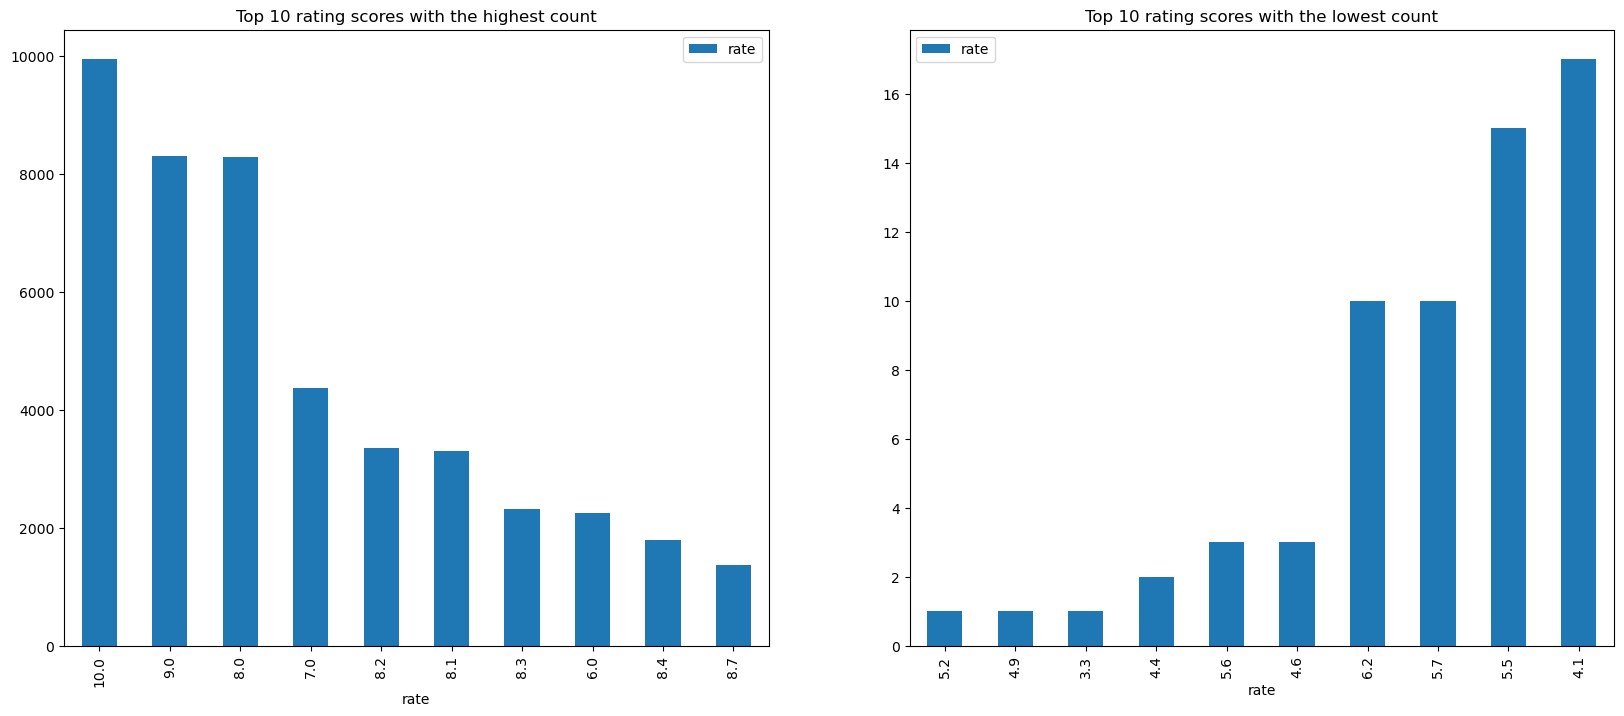

In [31]:
fig, axs = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

df1 = pd.DataFrame(rating.groupby('rate')['rate'].count().sort_values(ascending=False).head(10))
df1.plot.bar(ax=axs[0])
axs[0].set(title='Top 10 rating scores with the highest count')

df2 = pd.DataFrame(rating.groupby('rate')['rate'].count().sort_values(ascending=True).head(10))
df2.plot.bar(ax=axs[1])
axs[1].set(title='Top 10 rating scores with the lowest count')

- Nhận xét: 
    + Top 10 rate có số lượng cao nhất:
        - Các rate trong nhóm này có số lượng rate giảm từ 9943 xuống 1,376
        - Rate 10.0 sao có số lượng cao nhất với 9943 lượt rate
    + Top 10 rate có số lượng thấp nhất:
        - Các rate trong nhóm này có số lượng rate giao động từ 1 - 16.
        - Có một số rate chỉ nhận được 1 hoặc 2 rate như: rate 5.2 sao, 4.9 sao,...
    + So sánh:
        - Số lượng rate có thể ảnh hưởng đến độ tin cậy của đánh giá. Những rate có số lượng cao hơn có khả năng được đánh giá và xếp hạng dựa trên sự đồng thuận của nhiều người dùng.
        - Nhìn chung số lượng rate cao đều nằm ở rate có điểm cao cho thấy sự phổ biến và chất lượng của các phim có thể cao, và có thể dẫn đến sự tìm kiếm phim nhiều hơn.
        - Tuy nhiên, số lượng rate không phản ánh trực tiếp chất lượng của phim. Cần xem xét thêm các yếu tố khác như đánh giá cụ thể, nội dung, thể loại và sở thích cá nhân để có cái nhìn toàn diện hơn về phim.

[Text(0.5, 1.0, 'Top 10 movies with the lowest average rating')]

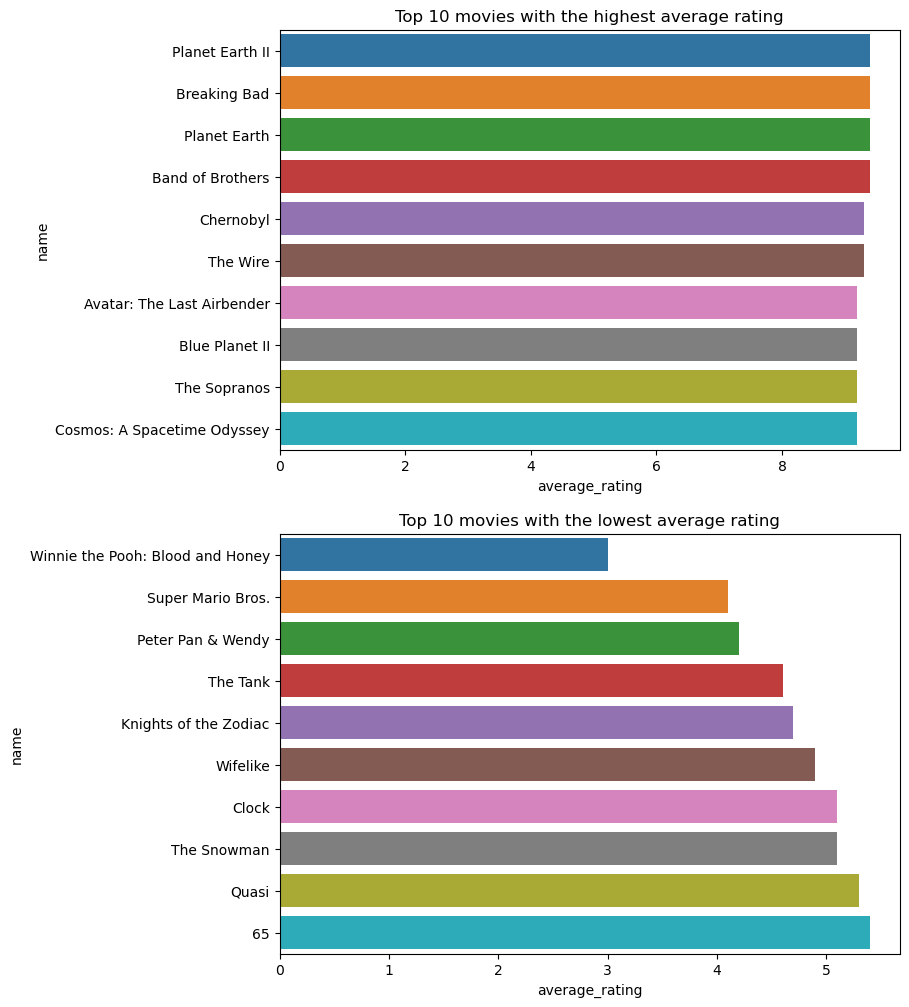

In [32]:
fig, axs = plt.subplots(figsize=(8,12), nrows=2, ncols=1)

top_10_movies_highest_avg_rating = movies.nlargest(10, 'average_rating')[['name', 'average_rating']].set_index('name')
sns.barplot(ax=axs[0], x="average_rating", y=top_10_movies_highest_avg_rating.index, data=top_10_movies_highest_avg_rating)
axs[0].set(title='Top 10 movies with the highest average rating')

top_10_movies_lowest_avg_rating = movies.nsmallest(10, 'average_rating')[['name', 'average_rating']].set_index('name')
sns.barplot(ax=axs[1], x="average_rating", y=top_10_movies_lowest_avg_rating.index, data=top_10_movies_lowest_avg_rating)
axs[1].set(title='Top 10 movies with the lowest average rating')

- Nhận xét:
    + Top 10 movies có điểm rate trung bình cao nhất:
        - Các phim trong danh sách này có điểm rate trung bình từ 9.2 đến 9.4.
        - Phim "Planet Earth II" có điểm rate trung bình cao nhất là 9.4
        - Các phim trong danh sách này đạt được sự đánh giá tích cực từ người dùng và có xu hướng được xem là phim chất lượng cao.
    + Top 10 movies có điểm rate trung bình thấp nhất:
        - Các movies trong danh sách này có điểm rate trung bình từ 3.0 đến 5.4.
        - Phim "Winnie the Pooh: Blood and Honey" có điểm rate trung bình thấp nhất là 3.0
        - Các movies trong danh sách này nhận được đánh giá thấp từ người dùng và có thể được xem là chất lượng thấp hơn so với các phim khác.
    + Sự ảnh hưởng của điểm rate đến phim:
        - Điểm rate có thể phản ánh sự đánh giá chung của người dùng về chất lượng và giá trị của phim.
        - Các phim có điểm rate trung bình cao thường được coi là chất lượng cao và có khả năng thu hút nhiều người dùng.
        - Điểm rate thấp có thể cho thấy sự không hài lòng của người dùng đối với phim và có thể gây ảnh hưởng tiêu cực đến sự quan tâm và tìm kiếm của người dùng.

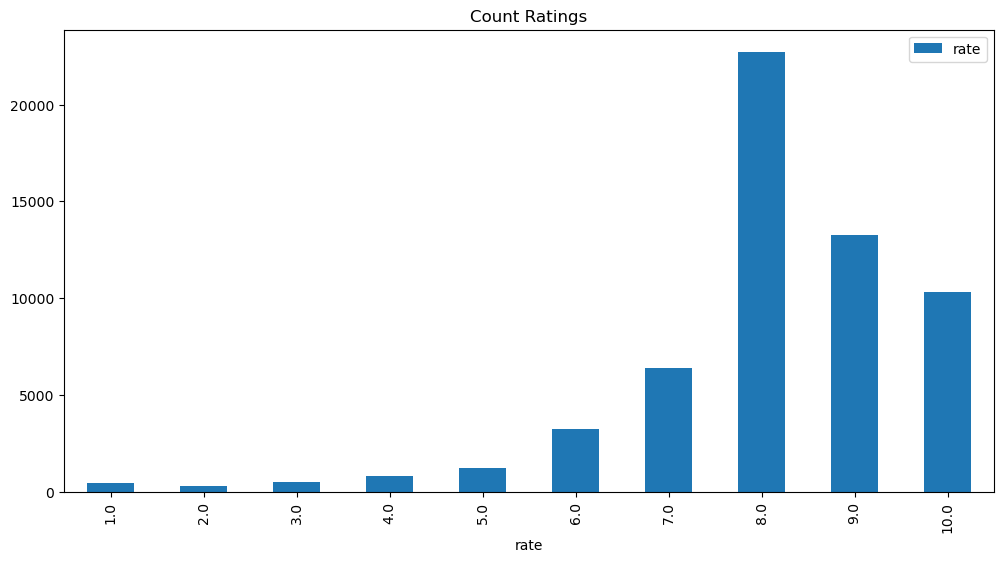

In [33]:
rating['rate'] = round(rating['rate'])
df1 = pd.DataFrame(rating.groupby('rate')['rate'].count())
df1.plot.bar(figsize=(12,6))
plt.title('Count Ratings')
plt.show()

- Nhận xét: 
    + Mức đánh giá 1.0 và 4.0:
        - Các mức đánh giá này có số lượng rate thấp hơn so với các mức đánh giá khác.
        - Mức đánh giá này cho thấy phim không được người dùng đánh giá tích cực hoặc có nhận định tiêu cực có số lượng rất ít.
    + Mức đánh giá từ 5.0 đến 7.0:
        - Sự tăng dần của số lượng rate từ mức 5.0 đến 7.0 có thể cho thấy sự quan tâm và đánh giá tích cực của người dùng đối với các mức đánh giá này.
    + Mức đánh giá từ 8.0 đến 10.0:
        - Số lượng rate tăng đáng kể từ mức 8.0 trở đi.
        - Sự tăng đột biến của số lượng rate từ mức 8.0 trở đi có thể cho thấy sự phổ biến và đánh giá tích cực của người dùng đối với các mức đánh giá cao như 8.0, 9.0 và 10.0.
    - Tổng quan, số lượng rate có thể tương quan với mức đánh giá của phim. Các mức đánh giá cao hơn có xu hướng có số lượng rate lớn hơn, trong khi các mức đánh giá thấp hơn có số lượng rate ít hơn